**Forecast Model : Holt-Winters Model with Training Data**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import dates
%matplotlib inline
from pandas import DataFrame as df

 **Import covid data from *Our World In Data***

In [ ]:
owid_df = pd.read_csv('https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-data.csv?raw=true')
covid_df = owid_df.location.unique()
indexer = owid_df[owid_df.location=='United States'].index

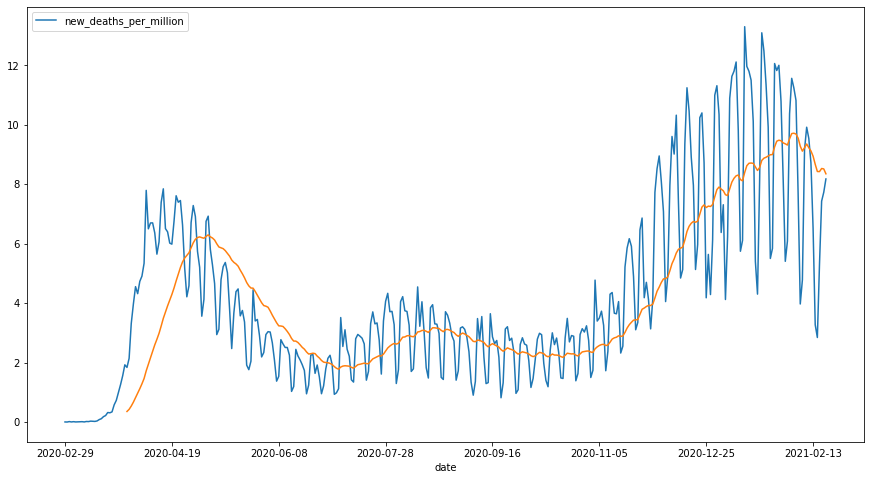

In [ ]:
covid_df = owid_df.loc[indexer, 'date':'new_deaths_per_million']
covid_df = covid_df.dropna()
covid_df.set_index('date', inplace=True)
covid_df.drop(covid_df.columns.difference(['new_deaths_per_million']), 1, inplace=True)
covid_df.plot(figsize=(15,8))
covid_df.rolling(window=30).mean()['new_deaths_per_million'].plot()
plt.show()

In [ ]:
record = len(covid_df.index)
train = round(record * 0.8, 0)
covid_df = covid_df.asfreq('d')
covid_df.info()
train_df = covid_df.iloc[:int(train)]
test_df = covid_df.iloc[int(train)-1:]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 357 entries, 2020-02-29 to 2021-02-19
Freq: D
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   new_deaths_per_million  357 non-null    float64
dtypes: float64(1)
memory usage: 5.6 KB


2020-12-11     9.168521
2020-12-12     8.698237
2020-12-13     7.579736
2020-12-14     8.127625
2020-12-15    10.035790
                ...    
2021-02-16    11.684924
2021-02-17    11.778141
2021-02-18    10.979121
2021-02-19    11.204400
2021-02-20    10.734115
Freq: D, Length: 72, dtype: float64


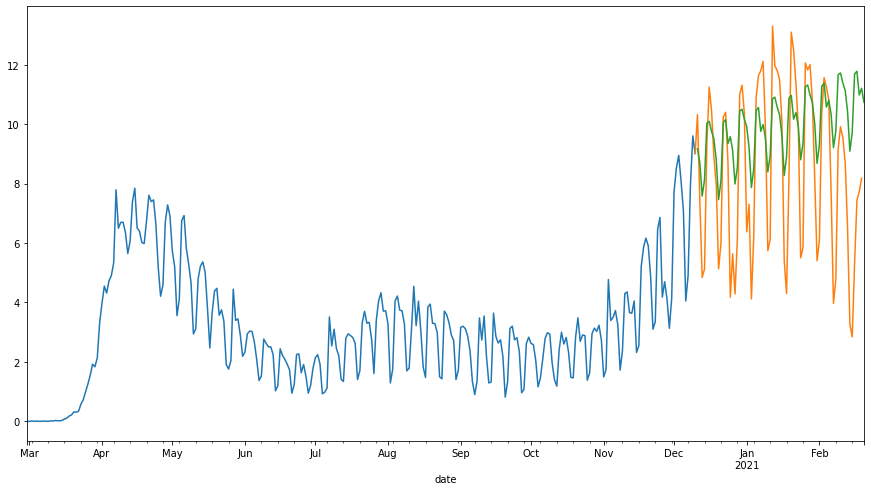

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
fit_model = ExponentialSmoothing(train_df['new_deaths_per_million'],
                                    trend='add',
                                    seasonal='add',
                                    seasonal_periods=14).fit()


prediction = fit_model.forecast(int(record-train+1))
print(prediction)
covid_df.index
train_df['new_deaths_per_million'].plot(figsize=(15,8))
test_df['new_deaths_per_million'].plot()
prediction.plot()

**Evaluate Test Data**

**1. Mean Absolute Error**

\begin{equation*}
\frac{1}{n}\sum_{n}^{i=1}|y_i - \hat{y}_i|
\end{equation*}

In [ ]:
def mae(y1, y2, axis=0):
    y1_np = y1.to_numpy()
    y2_np = y2.to_numpy()
    return np.mean(np.abs(y1_np - y2_np), axis=axis)

mae(test_df, prediction, None)

from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(test_df, prediction)

2.4874112172705702

**2. Mean Standard Error**

\begin{equation*}
\frac{1}{n}\sum_{n}^{i=1}({y_i - \hat{y}_i})^2
\end{equation*}

In [ ]:
def mse(y1, y2, axis=0):
    y1_np = y1.to_numpy()
    y2_np = y2.to_numpy()
    return ((y1_np-y2_np) ** 2).mean(axis=axis)

mse(test_df, prediction, None)

mean_squared_error(test_df, prediction)

9.946631221489236

**Root Mean Squared Error**

\begin{equation*}
\sqrt{\frac{1}{n}\sum_{n}^{i=1}({y_i - \hat{y}_i})^2}
\end{equation*}

In [ ]:
np.sqrt(mean_squared_error(test_df, prediction))

3.153828026619276

**Predict Future**

2021-02-20    4.886904
2021-02-21    1.414514
2021-02-22    2.452554
2021-02-23    7.964053
2021-02-24    8.406808
                ...   
2021-05-26    9.698162
2021-05-27    9.698659
2021-05-28    8.762190
2021-05-29    6.363258
2021-05-30    2.890868
Freq: D, Length: 100, dtype: float64


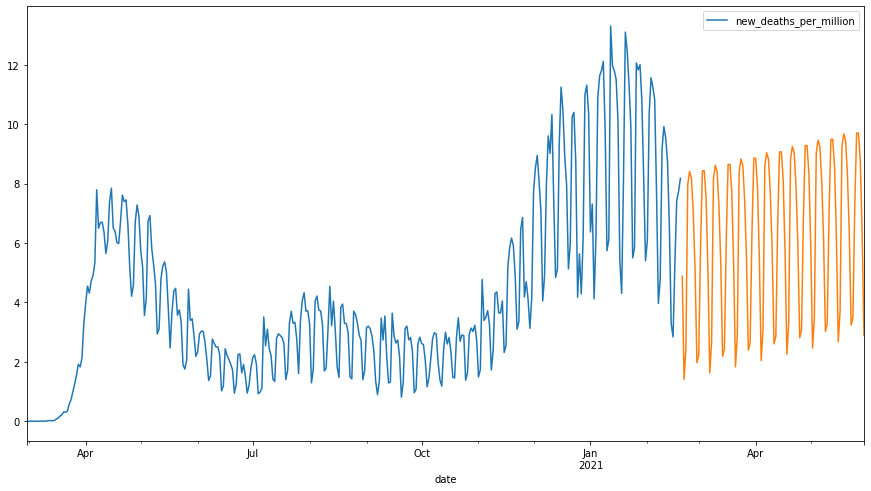

In [ ]:
covid_model = ExponentialSmoothing(covid_df['new_deaths_per_million'],
                                      trend='add',
                                      seasonal='add',
                                      seasonal_periods=14).fit()

covid_forecast = covid_model.forecast(100)
print(covid_forecast)
covid_df.plot(figsize=(15,8))

covid_forecast.plot()